In [1]:
# Cell 1: Mount Google Drive and Load Result Files

import pandas as pd
import json
from google.colab import drive

# Mount Google Drive
print("Mounting Google Drive...")
drive.mount('/content/drive')

# --- This path should point to where your results were saved ---
RESULTS_PATH = '/content/drive/MyDrive/Colab-VSR-Project/results'
print(f"Loading results from: {RESULTS_PATH}")

# Define the models you tested
models_tested = ['llava-1.5-7b', 'blip2-opt-2.7b', 'instructblip-vicuna-7b']
results_data = {}

for model_name in models_tested:
    file_path = f"{RESULTS_PATH}/{model_name}_VSR_results.json"
    try:
        with open(file_path, 'r') as f:
            results_data[model_name] = json.load(f)
        print(f"✅ Successfully loaded results for {model_name}")
    except FileNotFoundError:
        print(f"⚠️ Could not find results file for {model_name} at {file_path}")

Mounting Google Drive...
Mounted at /content/drive
Loading results from: /content/drive/MyDrive/Colab-VSR-Project/results
✅ Successfully loaded results for llava-1.5-7b
✅ Successfully loaded results for blip2-opt-2.7b
✅ Successfully loaded results for instructblip-vicuna-7b


In [2]:
# Cell 2: Calculate and Display Final Scores

final_scores = {}

for model_name, data in results_data.items():
    # We are focusing on the text audit results
    text_audit_results = data.get('text_audit', [])

    if not text_audit_results:
        print(f"No text audit data for {model_name}")
        continue

    df = pd.DataFrame(text_audit_results)

    # Calculate the Spatial Consistency Score (SCS)
    total_samples = len(df)
    consistent_count = (df['consistency'] == 'CONSISTENT').sum()
    indeterminate_count = (df['consistency'] == 'INDETERMINATE').sum()

    # Calculate consistency rate only on determinate results
    determinate_items = total_samples - indeterminate_count
    scs = consistent_count / determinate_items if determinate_items > 0 else 0

    final_scores[model_name] = scs

    print(f"\n--- Analysis for {model_name} ---")
    print(f"Total Samples: {total_samples}")
    print(f"Consistent: {consistent_count}")
    print(f"Spatial Consistency Score (SCS): {scs:.2%}")

# Display a summary table
print("\n" + "="*40)
print("      FINAL BENCHMARK RESULTS")
print("="*40)
summary_df = pd.DataFrame.from_dict(final_scores, orient='index', columns=['SCS'])
display(summary_df.style.format({'SCS': '{:.2%}'}))


--- Analysis for llava-1.5-7b ---
Total Samples: 100
Consistent: 0
Spatial Consistency Score (SCS): 0.00%

--- Analysis for blip2-opt-2.7b ---
Total Samples: 100
Consistent: 0
Spatial Consistency Score (SCS): 0.00%

--- Analysis for instructblip-vicuna-7b ---
Total Samples: 100
Consistent: 0
Spatial Consistency Score (SCS): 0.00%

      FINAL BENCHMARK RESULTS


,SCS
llava-1.5-7b,0.00%
blip2-opt-2.7b,0.00%
instructblip-vicuna-7b,0.00%


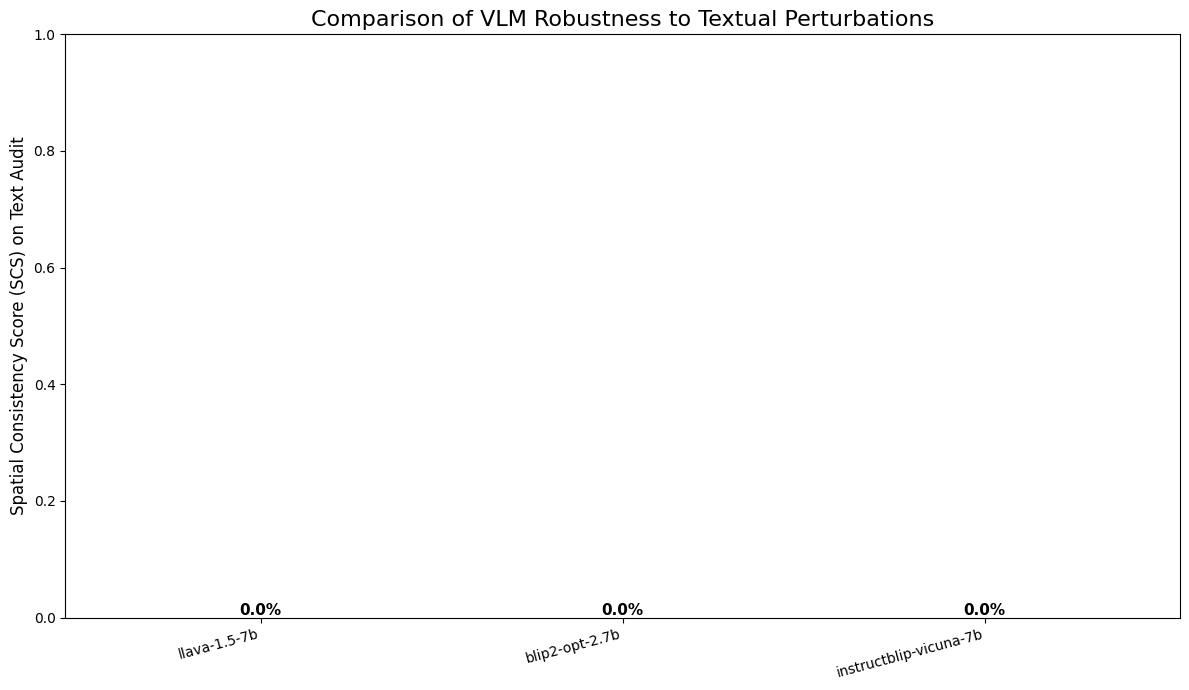

In [3]:
# Cell 3: Visualize the Results

import matplotlib.pyplot as plt

# Prepare data for plotting
model_names = list(final_scores.keys())
scores = list(final_scores.values())

# Create the bar chart
plt.figure(figsize=(12, 7))
bars = plt.bar(model_names, scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
plt.ylabel('Spatial Consistency Score (SCS) on Text Audit', fontsize=12)
plt.title('Comparison of VLM Robustness to Textual Perturbations', fontsize=16)
plt.xticks(rotation=15, ha="right")
plt.ylim(0, 1)

# Add percentage labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.1%}', va='bottom', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()